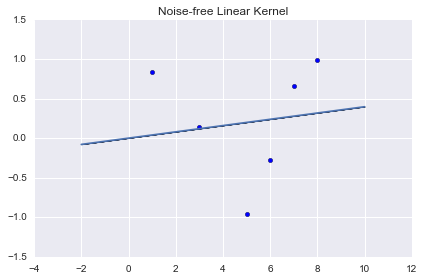

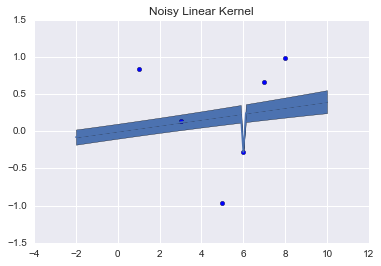

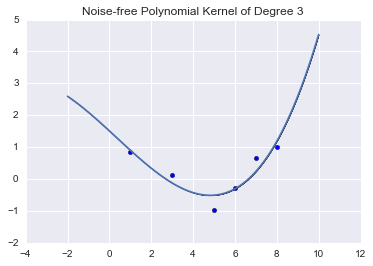

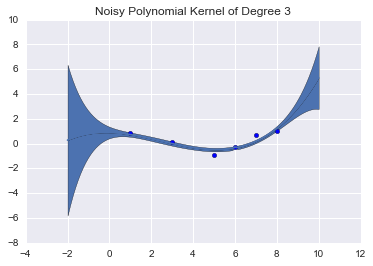

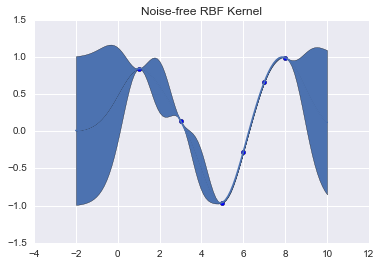

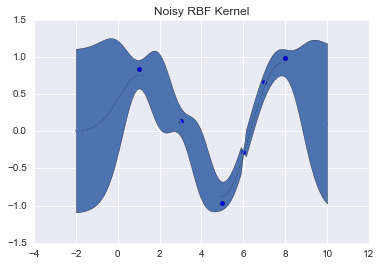

'\nWhat happens when the bandwidth parameter sig gets small? Large?\n\nThe kernel tightens around the data points when sig gets small, while a larger\nvalue smooths the curves. Choosing the right value of sig is a problem\nof balancing overfitting and underfitting.\n\nWhat happens when the degree M of the polynomial kernel gets small? Large?\n\nAgain, we have an overfitting vs underfitting problem, where a high\ndegree underfits and a low degree overfits.\n'

In [23]:
from __future__ import division
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

data_xvals = np.array([1.0,3.0,5.0,6.0,7.0,8.0])
data_yvals = np.sin(data_xvals)

sig2 = 0.1

def k_lin(x,y,noisy=False):
    if noisy and x==y:
        return x*y + sig2
    return x*y

def k_poly(x,y,noisy=False):
    deg = 3
    if noisy and x==y:
        return (1.0+x*y)**deg + sig2
    return (1.0+x*y)**deg

def k_gauss(x,y,noisy=False):
    # Is there supposed to be a -0.5 inside the exp?
    if noisy and x==y:
        return 1.0 + sig2
    return np.exp(-0.5*(x-y)**2)

# Calculate the kernel matrices
K_lin = np.zeros((6,6))
K_poly = np.zeros((6,6))
K_gauss = np.zeros((6,6))

for i in xrange(6):
    for j in xrange(6):
        K_lin[i,j] = k_lin(data_xvals[i],data_xvals[j])
        K_poly[i,j] = k_poly(data_xvals[i],data_xvals[j])
        K_gauss[i,j] = k_gauss(data_xvals[i],data_xvals[j])
        
# Get covariance inverses
K_lin_noisy = K_lin + sig2*np.eye(6)
K_poly_noisy = K_poly + sig2*np.eye(6)
K_gauss_noisy = K_gauss + sig2*np.eye(6)

K_lin_inv = np.linalg.pinv(K_lin)
K_lin_ninv = np.linalg.pinv(K_lin_noisy)

K_poly_inv = np.linalg.pinv(K_poly)
K_poly_ninv = np.linalg.pinv(K_poly_noisy)

K_gauss_inv = np.linalg.pinv(K_gauss)
K_gauss_ninv = np.linalg.pinv(K_gauss_noisy)

n = 100

# Noiseless Linear Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_lin(xtest[i],data_xvals[j]) for j in xrange(6)])
    Ktt = k_lin(xtest[i],xtest[i])
    result = np.dot(Kt,K_lin_inv)
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noise-free Linear Kernel")
plt.show()  
    
# Noisy Linear Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_lin(xtest[i],data_xvals[j],noisy=True) for j in xrange(6)])
    Ktt = k_lin(xtest[i],xtest[i],noisy=True)
    result = np.dot(Kt,K_lin_ninv) 
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noisy Linear Kernel")
plt.show()     

# Noiseless Polynomial Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_poly(xtest[i],data_xvals[j]) for j in xrange(6)])
    Ktt = k_poly(xtest[i],xtest[i])
    result = np.dot(Kt,K_poly_inv) 
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noise-free Polynomial Kernel of Degree 3")
plt.show()  

# Noisy Polynomial Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_poly(xtest[i],data_xvals[j],noisy=True) for j in xrange(6)])
    Ktt = k_poly(xtest[i],xtest[i],noisy=True)
    result = np.dot(Kt,K_poly_ninv) 
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noisy Polynomial Kernel of Degree 3")
plt.show()  
    
# Noiseless Gaussian Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_gauss(xtest[i],data_xvals[j]) for j in xrange(6)])
    Ktt = k_gauss(xtest[i],xtest[i])
    result = np.dot(Kt,K_gauss_inv) 
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noise-free RBF Kernel")
plt.show() 
    
# Noisy Gaussian Kernel
xtest = np.linspace(-2,10,n)
mu = np.zeros(n)
Sig = np.zeros(n)
for i in xrange(n):
    Kt = np.array([k_gauss(xtest[i],data_xvals[j],noisy=True) for j in xrange(6)])
    Ktt = k_gauss(xtest[i],xtest[i],noisy=True)
    result = np.dot(Kt,K_gauss_ninv) 
    mu[i] = np.dot(result,data_yvals)
    Sig[i] = Ktt - np.dot(result,Kt)

plt.plot(xtest,mu)
plt.fill_between(xtest,mu,mu-Sig)
plt.fill_between(xtest,mu,mu+Sig)
plt.scatter(data_xvals,data_yvals)
plt.title("Noisy RBF Kernel")
plt.show()  


"""
What happens when the bandwidth parameter sig gets small? Large?

The kernel tightens around the data points when sig gets small, while a larger
value smooths the curves. Choosing the right value of sig is a problem
of balancing overfitting and underfitting.

What happens when the degree M of the polynomial kernel gets small? Large?

Again, we have an overfitting vs underfitting problem, where a high
degree underfits and a low degree overfits.
"""